In [2]:
%load_ext autoreload
%autoreload 2

# Hyperparameters

In [3]:
v_dim = 320 # 20 * 16
h_dim = 100

# Load AlphaDigit Data

In [4]:
from utils import *

In [5]:
dataset = read_alpha_digit('./data/binaryalphadigs.mat', labels=[3])

# Build RBM model

In [6]:
from model.RBM import RBM
rbm = RBM(v_dim=320, h_dim=100)

# Train

In [7]:
rbm.fit(dataset[0], lr=0.1, batch_size=1, num_epochs=100)

100%|██████████| 100/100 [00:04<00:00, 20.06epochs/s, l2_loss=0.0153]


# Generation

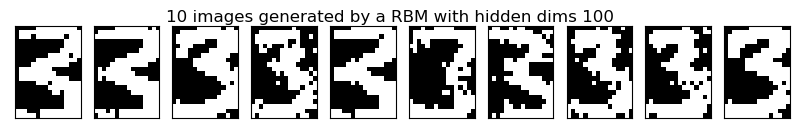

In [51]:
from utils import *
generate_image(rbm, 10, 10, './img/')

# DBN

## sanity check (1 layer DBN reduces to RBM)

layer 0: 100%|██████████| 100/100 [00:07<00:00, 13.26epochs/s, l2_loss=0.0258]


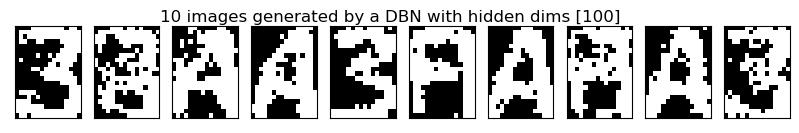

In [58]:
from model.DBN import DBN
dbn = DBN(v_dim=320, h_dims=[100])
dbn.fit(dataset[0], batch_size=1, num_epochs=100)
generate_image(dbn, 10, 10, './img/')

layer 1: 100%|██████████| 100/100 [00:03<00:00, 31.75epochs/s, l2_loss=0.00949]


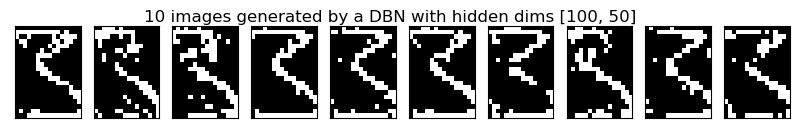

In [59]:
dbn_2 = DBN(v_dim=320, h_dims=[100, 50])
dbn_2.fit(dataset[0], batch_size=1, num_epochs=100)
generate_image(dbn_2, 10, 10, './img/')

layer 2: 100%|██████████| 100/100 [00:02<00:00, 44.27epochs/s, l2_loss=0.0787]


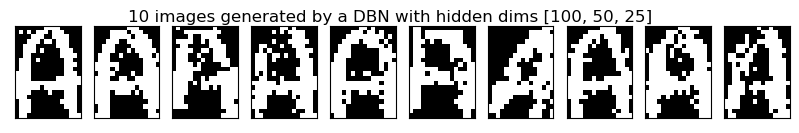

In [60]:
dbn_3 = DBN(v_dim=320, h_dims=[100, 50, 25])
dbn_3.fit(dataset[0], batch_size=1, num_epochs=100)
generate_image(dbn_3, 10, 10, './img/')

layer 3: 100%|██████████| 100/100 [00:02<00:00, 35.78epochs/s, l2_loss=0.149]


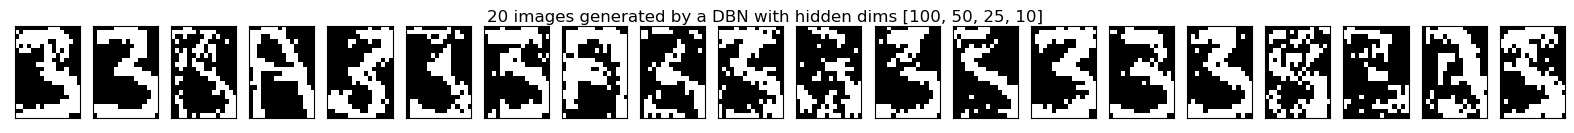

In [61]:
dbn_4 = DBN(v_dim=320, h_dims=[100, 50, 25, 10])
dbn_4.fit(dataset[0], batch_size=1, num_epochs=100)
generate_image(dbn_4, 20, 10, './img/')

# More classes of characters

In [56]:
dataset = read_alpha_digit('./data/binaryalphadigs.mat', labels=[3,10])

In [ ]:
dbn = DBN(v_dim=320, h_dims=[100])
dbn.fit(dataset[0], batch_size=1, num_epochs=100)
generate_image(dbn, 10, 10)

layer 1: 100%|██████████| 100/100 [00:02<00:00, 45.73epochs/s, l2_loss=0.0159]


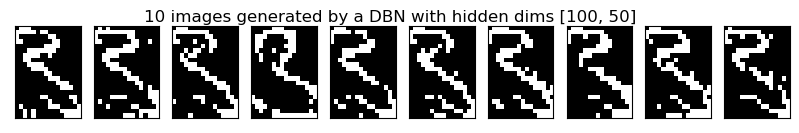

In [ ]:
dbn_2 = DBN(v_dim=320, h_dims=[100, 50])
dbn_2.fit(dataset[0], batch_size=1, num_epochs=100)
generate_image(dbn_2, 10, 10)

layer 2: 100%|██████████| 100/100 [00:01<00:00, 61.80epochs/s, l2_loss=0.079]


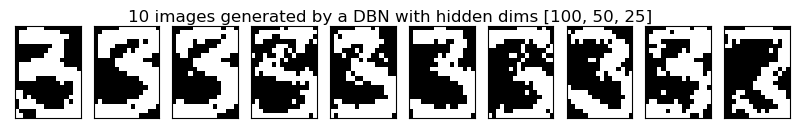

In [ ]:
dbn_3 = DBN(v_dim=320, h_dims=[100, 50, 25])
dbn_3.fit(dataset[0], batch_size=1, num_epochs=100)
generate_image(dbn_3, 10, 10)

layer 3: 100%|██████████| 100/100 [00:01<00:00, 52.62epochs/s, l2_loss=0.115]


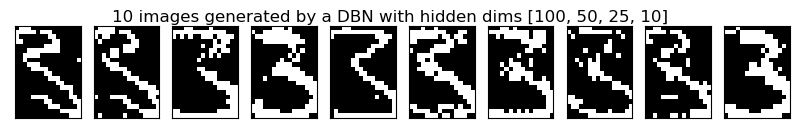

In [ ]:
dbn_4 = DBN(v_dim=320, h_dims=[100, 50, 25, 10])
dbn_4.fit(dataset[0], batch_size=1, num_epochs=100)
generate_image(dbn_4, 10, 10)

In [63]:
def generate_experiment(labels, model, n_samples, save_to):
		dataset = read_alpha_digit('./data/binaryalphadigs.mat', labels)
		model.fit(dataset[0], batch_size=1, num_epochs=100)
		fig = generate_image(model, n_samples, 10)
		if isinstance(model, RBM):
			cls = 'RBM'
			h_dims = model.h_dim
		elif isinstance(model, DBN):
			cls = 'DBN'
			h_dims = model.h_dims
		title = f'{n_samples} images generated by a {cls} with hidden dims {h_dims} learned on {labels}'
		fig.suptitle(title)
		fig.subplots_adjust(top=0.85)
		fig.savefig(save_to+f'{h_dims}_{cls}_on_{labels}.png')

In [ ]:
rbm = RBM(320, 100)
rbm2 = RBM(320, 200)
rbm3 = RBM(320, 300)
dbn1 = DBN(320, [100, 100])
dbn2 = DBN(320, [100, 100, 100])
dbn3 = DBN(320, [100, 100, 100, 100])
dbn3 = DBN(320, [200, 200])
dbn4 = DBN(320, [300, 300])

model_list = [rbm, rbm2, rbm3, dbn1, dbn2, dbn3, dbn4]
for model in model_list:
    generate_experiment([3], model, 20, './img/')
    generate_experiment([3, 10], model, 20, './img/')
    generate_experiment([3, 10, 20], model, 20, './img/')